<h1 style = "text-align: center; ">What influences a VW Golf price?</h1>
<h2 style = "text-align: center; ">ST445 - Managing and Visualizing Data</h2>
<h3 style = "text-align: center; ">Candidate IDs: 38682, 50450, 44051</h3>


##### Overview
##### I. Notebook preparation
##### II. Introduction: Research Question + Data Choice
##### III. Data acquisition
        a. UK used cars data (Kaggle API) + EDA (Plot Car Makes over years and price average) (Plot VW Golf)
        b. Economic factors (Webscraping)
        c. Environmental factors (manual PDF extraction)
##### IV. Data Visualization
        a. Price vs. Car Data (Heat Map, Correlation Matrix)
        b. Price vs. Economic Factors (??)
        c. Price vs. Environmental Factors (??)
        d. choose most influential factors (max 3)
##### V. Data Modeling
        a. Model Linear Regression on 3 best variables
##### VI. Conclusion

![Volkswagen Golf](https://m.atcdn.co.uk/vms/media/w980/2fa3b55ab44d4744969f968b5727c8d2.jpg)

### I. Notebook preparation (maybe this section is not needed)

Perhaps we include something similar to this example from "Example 2"

[[Before running this notebook, please make sure you have all necessary modules installed in your environment. Potentially less common modules used include:

google.cloud
dotenv
networkx
geopandas
praw
transformers
plotly.graph_objects
ipywidgets
folium
As usual, they can be installed by running the command pip install [module] in the terminal.

Furthermore, please make sure your Python version is compatible with all the modules. While writing this, it became apparent there might be some compatibility issues with newer Python versions (especially 3.11 and newer). In case you run into any issues, it might be worth trying to run the code with an older version such as Python 3.9.]]

Our complete GitHub repository can be found at the following location: https://github.com/lse-st445/2024-project-data-knows-ball [[Should we put this in the title of our paper??]]

In [2]:
# Import relevant packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
import numpy as np
import os
import zipfile
import sqlite3
from matplotlib import pyplot as plt
import seaborn as sns

# Install lxml with conda install anaconda::lxml to use HMTL and XML with Python
# conda install openpyxl

After importing all necessary libararies, we set the standard settings for the notebook regarding the plot sizes of visualiasing our data.

In [3]:
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 5)

# Size of matplotlib histogram bins
bin_size = 10

### II. Introduction and data description

[[Describe our data sets and pose our research question]]

[[Maybe include data dictionaries of some sort similar to Table 1.3.1 and Table 1.3.2 in "Example 2"]]

### III. Data acquisition

#### III.a. UK 100k Cars Data

##### III.a.i. Kaggle API

In the first part of our data acquisition, we are focusing on gathering as much used car data as possible for understanding the UK used cars landscape. After that, we can further focus on the VW Golf data as an example car which is one of the most used cars in the UK. 

To acquire UK used cars data, the choice was to work with Kaggle since several datasets for UK used cars are available on the platform which are ready to be worked with. In order to work with the data, we are using the Kaggle API to access the data via a download. This initiated to download the relevant .csv files for our work with the UK used cars landscape. 

In [2]:
# Use Kaggle API to access the relevant dataset
import kaggle

# reading API key from txt file
with open("st445_api_key.txt", "r") as file:
    api_key = file.read().strip()  # .strip() to remove extra newline/whitespace

kaggle.api.authenticate()
# kaggle.api.dataset_download_files("adityadesai13/used-car-dataset-ford-and-mercedes", path=".", unzip=True)
kaggle.api.dataset_download_files(f"{api_key}", path=".", unzip=True)

Dataset URL: https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes


In the following the data gathered from the Kaggle dataset was uploaded into the github repository from where we are loading it into sepearte dataframes. Ultimately all cars data, which are seperated into the makes by .csv files, are merged alltogether into one lareg dataframe allowing us to perform EDA on the UK used cars landscape. 

In [4]:
# Load retrieved data into Dataframes and modify
uk_cars_audi = pd.read_csv("audi.csv")
uk_cars_audi["Make"] = "Audi"
uk_cars_bmw = pd.read_csv("bmw.csv") 
uk_cars_bmw["Make"] = "BMW"
uk_cars_ford = pd.read_csv("ford.csv")
uk_cars_ford["Make"] = "Ford"
uk_cars_hyundai = pd.read_csv("hyundi.csv")
uk_cars_hyundai["Make"] = "Hyundai"
uk_cars_mercedes = pd.read_csv("skoda.csv")
uk_cars_mercedes["Make"] = "Mercedes"
uk_cars_skoda = pd.read_csv("skoda.csv")
uk_cars_skoda["Make"] = "Skoda"
uk_cars_toyota = pd.read_csv("toyota.csv")
uk_cars_toyota["Make"] = "Toyota"
uk_cars_vauxhall = pd.read_csv("vauxhall.csv")
uk_cars_vauxhall["Make"] = "Vauxhall"
uk_cars_vw = pd.read_csv("vw.csv")
uk_cars_vw["Make"] = "VW"

# Merge to one DataFrame
uk_cars_make = [uk_cars_audi, uk_cars_bmw, uk_cars_ford, 
                uk_cars_hyundai, uk_cars_mercedes, uk_cars_skoda, 
                uk_cars_toyota, uk_cars_vauxhall, uk_cars_vw]
uk_cars_data = pd.concat(uk_cars_make)

In [5]:
display(uk_cars_data)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make,tax(£)
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,Audi,NaN
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,Audi,NaN
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,Audi,NaN
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,Audi,NaN
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,Audi,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,VW,NaN
15153,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,VW,NaN
15154,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,VW,NaN
15155,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,VW,NaN


We do have to make some modifications and clean up to the make main uk_cars_data dataframe in order to make it ready to be worked with. 
1. We need to reset the indexes, since we have 92.335 cars and not ca. 15k (this is due to merging separate dataframes and their indexes)
2. Some cars' road taxes are stated seperately in the column "tax (£)", altough all .csv files are formatted with the "tax" column. Thus we need to merge both, since the original "tax" column is stated in GBP £
3. We want to add a column to know the respective Make in the overview dataframe uk_cars_data (and moving it to the first column of the dataframe)
4. We need a standardized price index for price/mileage to be able to compare the cars with different mileages

In [6]:
# 1. Modifying the indexes of the dataframe so we can work with it
number_of_cars = len(uk_cars_data)
new_indexes = list(range(0, number_of_cars))
uk_cars_data = uk_cars_data.reset_index(drop=True)
uk_cars_data = uk_cars_data.reindex(index=new_indexes)

# 2. Adjusting the column Tax(£)
if 'tax' not in uk_cars_data.columns:
    uk_cars_data['tax'] = None
uk_cars_data['tax'] = uk_cars_data['tax'].combine_first(uk_cars_data['tax(£)'])
uk_cars_data = uk_cars_data.drop(columns='tax(£)')

# 3. Make of the cars to the beginning of the dataframe
columns_order = ["Make"] + [col for col in uk_cars_data.columns if col != "Make"]
uk_cars_data = uk_cars_data[columns_order]

# 4. Add another column with the comparison index price/mileage
uk_cars_data["price/mileage"] = uk_cars_data["price"]/uk_cars_data["mileage"]

In [7]:
display(uk_cars_data)

,Make,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price/mileage
0,Audi,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,0.794407
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,0.455763
2,Audi,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,0.367328
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,0.647349
4,Audi,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,8.658659
...,...,...,...,...,...,...,...,...,...,...,...
92330,VW,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,0.080946
92331,VW,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,0.020420
92332,VW,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,0.022714
92333,VW,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,0.015114


##### III.a.ii. EDA of UK used cars data
Here we are performing explanatory data analysis to understand the UK used cars landscape better by looking into the dataframe more closely.

In [8]:
# 1. Generate Overview of the main dataframe
uk_cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92335 entries, 0 to 92334
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           92335 non-null  object 
 1   model          92335 non-null  object 
 2   year           92335 non-null  int64  
 3   price          92335 non-null  int64  
 4   transmission   92335 non-null  object 
 5   mileage        92335 non-null  int64  
 6   fuelType       92335 non-null  object 
 7   tax            92335 non-null  float64
 8   mpg            92335 non-null  float64
 9   engineSize     92335 non-null  float64
 10  price/mileage  92335 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 8.5+ MB


In [9]:
# 2. Understand how many values we have per category
unique_counts = uk_cars_data.nunique()
print(unique_counts)

Make                 9
model              168
year                27
price            11271
transmission         4
mileage          39387
fuelType             5
tax                 47
mpg                187
engineSize          32
price/mileage    81904
dtype: int64


In [10]:
# Create a list of unique car makes and corresponding colors
unique_makes = uk_cars_data["Make"].unique()
palette = sns.color_palette("tab10", n_colors=len(unique_makes))
color_map = dict(zip(unique_makes, palette))

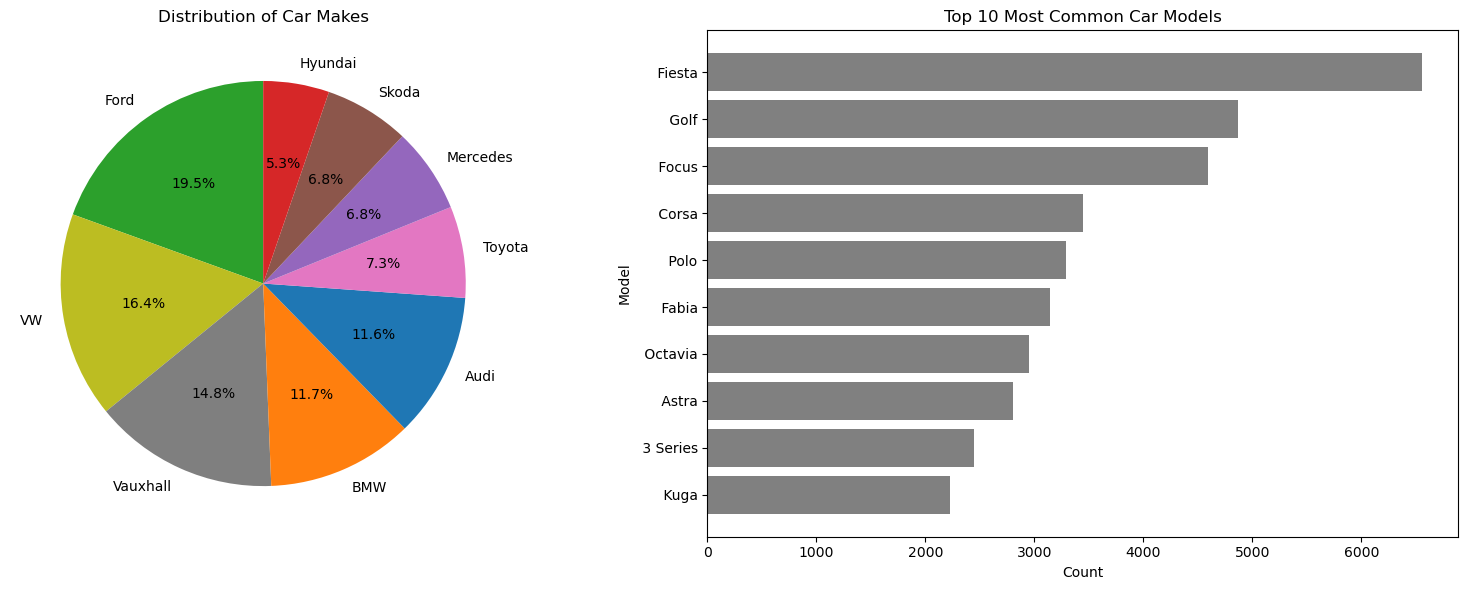

In [11]:
# 3. Overview of car makes and models

# Create a list of unique car makes
unique_makes = uk_cars_data["Make"].unique()

# Count the occurrences of each make and top 10 models
make_counts = uk_cars_data["Make"].value_counts()
model_counts = uk_cars_data["model"].value_counts()
top_10_models = model_counts.head(10)

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the pie chart in the first subplot
axes[0].pie(make_counts, labels=make_counts.index, autopct='%1.1f%%', startangle=90, colors=[color_map[make] for make in make_counts.index])
axes[0].set_title("Distribution of Car Makes")

# Plot the horizontal bar chart in the second subplot
axes[1].barh(top_10_models.index, top_10_models.values, color=[color_map.get(make, "gray") for make in top_10_models.index])
axes[1].set_xlabel("Count")
axes[1].set_ylabel("Model")
axes[1].set_title("Top 10 Most Common Car Models")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


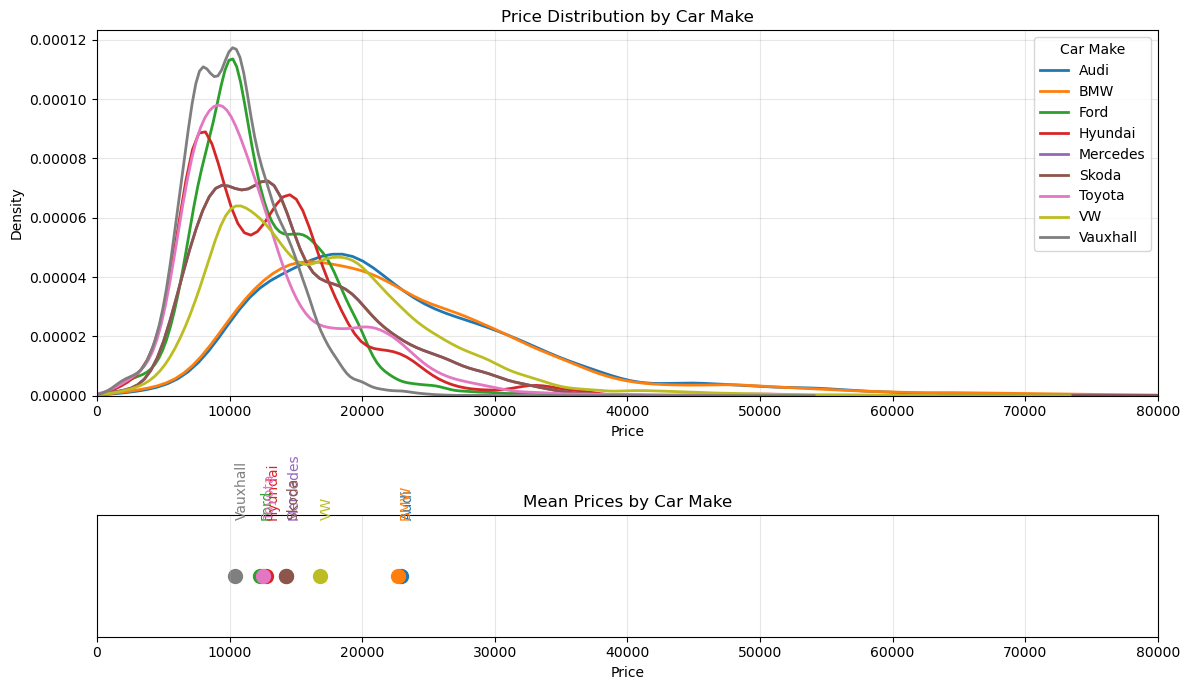

In [12]:
# 4. Clustering into lower, mid, higher segment using price

# Calculate mean prices for each make
make_means = uk_cars_data.groupby("Make")["price"].mean()

# Filter data for the makes in make_means
filtered_data = uk_cars_data[uk_cars_data["Make"].isin(make_means.index)]

# Set up the figure and axes
fig, axes = plt.subplots(2, 1, figsize=(12, 7), gridspec_kw={'height_ratios': [3, 1]})

# First plot: KDE curves
for make in make_means.index:
    sns.kdeplot(data=filtered_data[filtered_data["Make"] == make], x="price", label=make, ax=axes[0], linewidth=2, color=color_map[make])
axes[0].set_title("Price Distribution by Car Make")
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Density")
axes[0].legend(title="Car Make")
axes[0].grid(alpha=0.3)
axes[0].set_xlim((0, 80000))  # Set x-axis range for KDE plot

# Second plot: Mean prices on a single-dimensional line
for make in make_means.index:
    axes[1].scatter(make_means[make], 0, color=color_map[make], s=100, label=make)
axes[1].set_yticks([])  # Remove y-axis ticks for clarity
axes[1].set_xlim((0, 80000))  # Match x-axis range for the mean plot
axes[1].set_title("Mean Prices by Car Make")
axes[1].set_xlabel("Price")
axes[1].grid(alpha=0.3)

# Annotate means with car make labels
for make, mean in make_means.items():
    axes[1].text(mean, 0.05, make, rotation=90, va='bottom', fontsize=10, color=color_map[make])

plt.tight_layout()
plt.show()

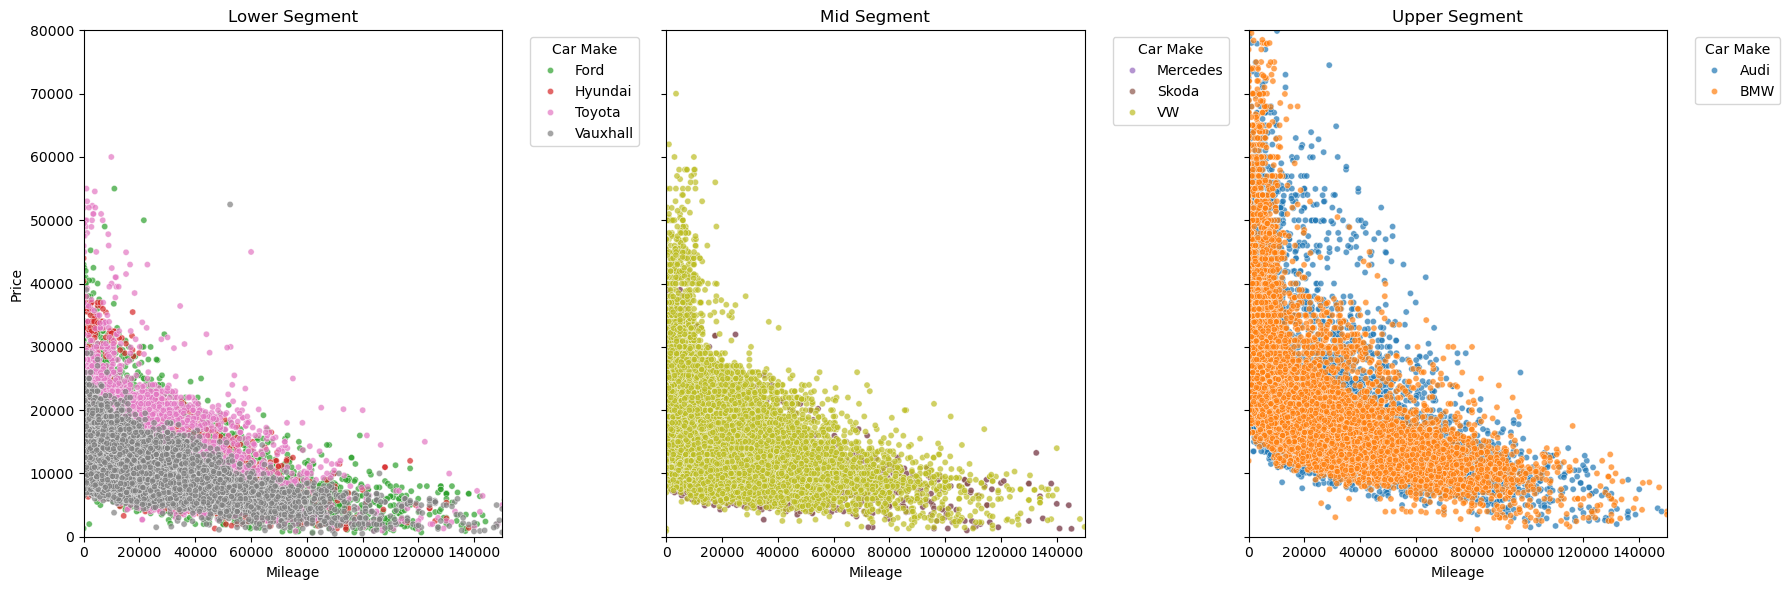

In [13]:
# Define the segments and their corresponding makes
segments = {
    "Lower Segment": ["Vauxhall", "Ford", "Toyota", "Hyundai"],
    "Mid Segment": ["Skoda", "Mercedes", "VW"],
    "Upper Segment": ["Audi", "BMW"]
}

# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Plot scatter plots for each segment
for idx, (segment_name, makes) in enumerate(segments.items()):
    # Filter data for the current segment
    segment_data = uk_cars_data[uk_cars_data["Make"].isin(makes)]
    sns.scatterplot(data=segment_data, x="mileage", y="price", hue="Make", palette=color_map, alpha=0.7, s=20, ax=axes[idx])
    
    # Set plot attributes
    axes[idx].set_xlim(0, 150000)
    axes[idx].set_ylim(0, 80000)
    axes[idx].set_title(segment_name)
    axes[idx].set_xlabel("Mileage")
    axes[idx].set_ylabel("Price")
    axes[idx].legend(title="Car Make", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


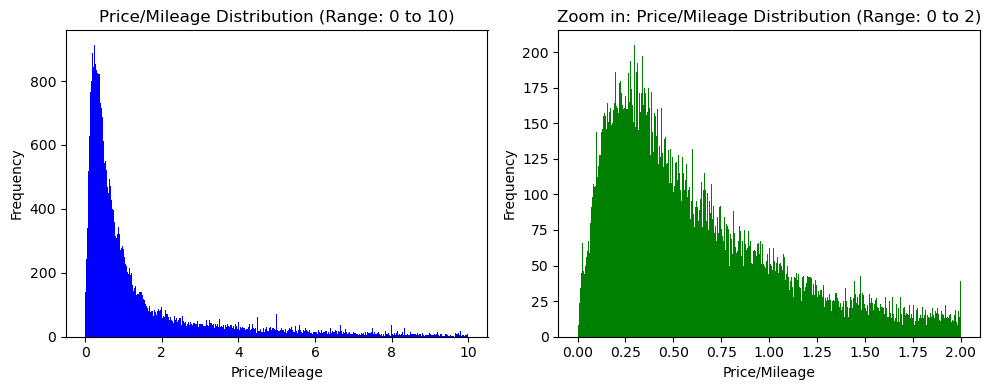

In [14]:
# 5. Distribrution of Price/Mileage
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# First histogram
axes[0].hist(uk_cars_data["price/mileage"], bins=1000, range=(0, 10), color='blue')
axes[0].set_title("Price/Mileage Distribution (Range: 0 to 10)")
axes[0].set_xlabel("Price/Mileage")
axes[0].set_ylabel("Frequency")

# Second histogram
axes[1].hist(uk_cars_data["price/mileage"], bins=1000, range=(0, 2), color='green')
axes[1].set_title("Zoom in: Price/Mileage Distribution (Range: 0 to 2)")
axes[1].set_xlabel("Price/Mileage")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

#### III.b. UK Office of National Statistics (ONS)

##### III.b.i Webscrapping: Unemployment rate and CPIH (time series economic data)

In [15]:
# Write function for webscrapping data from the UK Office of National Statistics
def webscrape_ONS(url):
    '''
    This function webscrapes various tables from the UK ONS and seperates the data 
    into distinct dataframes based on the given periodicity: year, quarter, or month.
    ----------
    Args:
        url: The UK Office of National Statistics url from which to webscrabe the table
    ----------
    Returns:        
        ons_year_df: Dataframe of UK ONS data at the yearly level
        ons_quarter_df: Dataframe of UK ONS data at the quarterly level
        ons_month_df: Dataframe of UK ONS data at the monthly level
    '''
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "lxml")

    # Save the table headers to later set as column names for the dataframes
    table_headers = soup.find_all("th")
    table_headers = table_headers[0:2] # We only need the first two columns of data from the ONS
    table_headers = [t.text for t in table_headers]

    ons_data = []

    # Identify and append all webscrapped rows of the ONS table into a dataframe
    for i, row in enumerate(soup.find_all("tr")[2:]): # The frist two rows of ONS tables are headers
        try:
            period, value = row.find_all("td")[0:2] # We only need the first two columns of data from the ONS
            ons_data.append([period.text, value.text])
        except:
            print("Error parsing row #{}".format(i))

    ons_df = pd.DataFrame(ons_data, columns = table_headers)

    # Make the "Value" column data type float instead of string as it was webscrapped
    ons_df = ons_df.astype({"Value": float})

    # Split the data into separate dataframes based on periodicity (year/quarter/month)
    ons_year_df = ons_df[ons_df["Period"].str.len() == 4].reset_index(drop = True) # Year periods will have 4 characters (e.g., "2020")
    ons_quarter_df = ons_df[ons_df["Period"].str.len() == 7].reset_index(drop = True) # Quarter periods will have 7 characters (e.g., "2020 Q1")
    ons_month_df = ons_df[ons_df["Period"].str.len() == 8].reset_index(drop = True) # Month periods will have 8 characters (e.g., "2020 JAN")

    # For dataframes at the yearly level, make year an int type instead of string as it was webscrapped
    ons_year_df = ons_year_df.astype({"Period": int})
    
    # Ensure that all rows present in the original ONS table are present in the three dataframes split based on periodicity
    split_df_len = sum([len(ons_year_df), len(ons_quarter_df), len(ons_month_df)])
    orig_df_len = len(ons_data)
    assert split_df_len == orig_df_len, "ERROR: Not all rows from original ONS table present in corresponding year/quarter/month dataframes"

    return ons_year_df, ons_quarter_df, ons_month_df


In [16]:
# Webscrape UK unemployment and CPIH data tables from the ONS
url_uk_unemp = "https://www.ons.gov.uk/employmentandlabourmarket/peoplenotinwork/unemployment/timeseries/mgsx/lms"
url_uk_cpih = "https://www.ons.gov.uk/economy/inflationandpriceindices/timeseries/l55o/mm23"

uk_unemp_year_df, uk_unemp_quarter_df, uk_unemp_month_df = webscrape_ONS(url_uk_unemp)
uk_cpih_year_df, uk_cpih_quarter_df, uk_cpih_month_df = webscrape_ONS(url_uk_cpih)


#### Current datasets that we have:

UK national unemployment data at the year (1971-2023), quarter (1971Q1-2023Q3), and month (1971FEB-2024SEP) level. <br>
Webscrapped from UK Office of National Statistics: https://www.ons.gov.uk/employmentandlabourmarket/peoplenotinwork/unemployment/timeseries/mgsx/lms <br>
**uk_unemp_year_df**, **uk_unemp_quarter_df**, **uk_unemp_month_df**

UK national CPIH data at the year (1989-2024), quarter (1989Q1-2024Q4), and month (1989JAN-2024DEC) level. <br>
Webscrapped from UK Office of National Statistics: https://www.ons.gov.uk/economy/inflationandpriceindices/timeseries/l55o/mm23 <br>
**uk_cpih_year_df**, **uk_cpih_quarter_df**, **uk_cpih_month_df**


[[Description of what visualizations we decided to include and why]]

### III. c. Environmental factors: Volkswagen Golf CO2 Emissions Data

Finally, in order to explore the effects of emission performance in concert with economic indicators and car specification on used Volkswagen Golf prices, we gather the CO2 emissions data from Volkswagen price and specification guides/catalogues from 2015-2020. This is done by gathering the PDFs published by Volkswagen themselves and manually retrieving the emissions levels for each kind, or setup, or car in the data set. Due to limitations the catalogues themselves, criteria such as fuel type are restricted to just 'Petrol' and 'Diesel', engine size to 1.0, 1.4, 1.5, 1.6, and 2.0 litres, and transmission to 'Manual' and 'Automatic'. 

In [27]:
vw = pd.read_csv("vw.csv")
vw['model'] = vw['model'].str.strip()
golf = vw[vw['model'] == 'Golf']

display(golf)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
733,Golf,2019,17000,Manual,8000,Diesel,145,57.7,1.6
734,Golf,2019,36000,Automatic,4000,Petrol,145,32.8,2.0
735,Golf,2015,19390,Automatic,20031,Petrol,200,40.4,2.0
736,Golf,2019,16290,Automatic,14821,Petrol,145,44.8,1.0
737,Golf,2017,16491,Automatic,20693,Petrol,20,60.1,1.4
...,...,...,...,...,...,...,...,...,...
5591,Golf,2015,11750,Manual,79000,Diesel,20,67.3,2.0
5592,Golf,2016,11950,Automatic,41725,Petrol,30,53.3,1.4
5593,Golf,2017,12950,Automatic,44837,Diesel,20,67.3,2.0
5594,Golf,2014,11299,Manual,25495,Petrol,30,53.3,1.4


In [28]:

vw['fuelType'] = vw['fuelType'].str.strip()
vw['transmission'] = vw['transmission'].str.strip()



def make_setup(row):
    return str(row['year']) + " " + row['transmission'] + " " + row['fuelType'] + " " + str(row['engineSize'])
#golf['setup'] = str(golf['year']) + row['fuelType'].str.strip() + str(row['engineSize'].str.strip())

# Apply the custom function row-wise to concatenate
golf['setup'] = golf.apply(make_setup, axis=1)


/var/folders/wq/pb9dbnn96x5gvb9hxyx_7jgr0000gn/T/ipykernel_1056/1977648790.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  golf['setup'] = golf.apply(make_setup, axis=1)


In [29]:
# sort df by year
golf = golf.sort_values(by='year')

# just want 2015-2020
golf = golf[golf['year'] > 2014]

# dropping 'Other' and 'Hybrid' fuel types
golf['fuelType'] = golf['fuelType'].str.strip()
golf = golf[golf['fuelType'] != 'Other']
golf = golf[golf['fuelType'] != 'Hybrid']


golf = golf[golf['engineSize'] != 0.0]

# dropping semi-auto transmission
golf = golf[golf['transmission'] != 'Semi-Auto']

In [45]:

emissions_dict = {
    '2015 Manual Petrol 2.0' : 139,
    '2015 Manual Diesel 2.0' : 106,
    '2015 Manual Petrol 1.4' : 120,
    '2015 Manual Diesel 1.6' : 99,
    '2015 Automatic Diesel 1.6' : 102,
    '2015 Automatic Diesel 2.0' : 117,
    '2015 Automatic Petrol 2.0' : 145,
    '2015 Automatic Petrol 1.4' : 116,
    '2015 Manual Petrol 1.2' : 113, 
    '2016 Automatic Diesel 1.6' : 102,
    '2016 Manual Petrol 1.4' : 120, 
    '2016 Manual Diesel 2.0' : 109,
    '2016 Manual Diesel 1.6' : 103,
    '2016 Automatic Petrol 2.0' : 145,
    '2016 Manual Petrol 2.0' : 148,
    '2016 Automatic Diesel 2.0' : 117,
    '2016 Automatic Petrol 1.4' : 120,
    '2016 Manual Petrol 1.0' : 105,
    '2016 Automatic Petrol 1.0' : 103, 
    '2016 Manual Petrol 1.2' : 113,
    '2017 Manual Petrol 1.0' : 105,
    '2017 Manual Diesel 1.6' : 105,
    '2017 Manual Petrol 1.4' : 120, 
    '2017 Manual Petrol 2.0' : 162, 
    '2017 Automatic Petrol 1.4' : 116,
    '2017 Manual Diesel 2.0' : 114, 
    '2017 Automatic Diesel 2.0' : 127,
    '2017 Manual Petrol 1.2' : 113, 
    '2017 Automatic Petrol 2.0' : 160,
    '2017 Automatic Diesel 1.6' : 104,
    '2017 Automatic Petrol 1.0' : 103, 
    '2017 Automatic Diesel 1.4' : 102,
    '2018 Manual Petrol 1.4' : 120,
    '2018 Manual Petrol 2.0' : 148, 
    '2018 Automatic Petrol 2.0' : 148,
    '2018 Manual Petrol 1.0' : 108, 
    '2018 Manual Diesel 1.6' : 106,
    '2018 Manual Diesel 2.0' : 109, 
    '2018 Automatic Petrol 1.4' : 119,
    '2018 Manual Petrol 1.5' : 110, 
    '2018 Automatic Diesel 2.0' : 114,
    '2018 Automatic Petrol 1.5' : 110, 
    '2018 Automatic Diesel 1.6' : 102,
    '2018 Automatic Petrol 1.0' : 108, 
    '2019 Manual Diesel 1.6' : 109,
    '2019 Manual Petrol 1.5' : 130, 
    '2019 Automatic Petrol 1.5' : 130,
    '2019 Manual Petrol 1.0' : 109,
    '2019 Automatic Diesel 2.0' : 116,
    '2019 Manual Diesel 2.0' : 115,
    '2019 Automatic Diesel 1.6' : 104,
    '2019 Automatic Petrol 1.0' : 110, 
    '2020 Manual Diesel 1.6' : 134,
    '2020 Automatic Petrol 1.5' : 145, 
    '2020 Manual Petrol 1.5' : 135,
    '2020 Automatic Diesel 2.0' : 142, 
    '2020 Manual Diesel 2.0' : 137, 
    '2020 Manual Petrol 1.0' : 115
    }

golf['CO2 Emissions (g/km)'] = golf['setup'].map(emissions_dict).astype("float64")

In [44]:
display(golf)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,setup,CO2 Emissions (g/km)
1913,Golf,2015,9495,Manual,53474,Petrol,30,53.3,1.4,2015 Manual Petrol 1.4,120.0
2478,Golf,2015,10400,Manual,39453,Petrol,30,53.3,1.4,2015 Manual Petrol 1.4,120.0
805,Golf,2015,10698,Manual,38357,Petrol,30,53.3,1.4,2015 Manual Petrol 1.4,120.0
1517,Golf,2015,10650,Manual,19184,Petrol,30,53.3,1.4,2015 Manual Petrol 1.4,120.0
1037,Golf,2015,18498,Manual,25102,Petrol,200,39.8,2.0,2015 Manual Petrol 2.0,139.0
...,...,...,...,...,...,...,...,...,...,...,...
5290,Golf,2020,25000,Manual,1000,Petrol,150,49.6,1.5,2020 Manual Petrol 1.5,135.0
2104,Golf,2020,20995,Manual,899,Petrol,145,47.1,1.5,2020 Manual Petrol 1.5,135.0
2103,Golf,2020,20995,Manual,899,Petrol,145,47.1,1.5,2020 Manual Petrol 1.5,135.0
3283,Golf,2020,21000,Manual,2000,Petrol,145,47.1,1.5,2020 Manual Petrol 1.5,135.0


[[Explanation/interpretation of the visualizations are depicting]]

### IV. Data Visualization

#### IV.a. Price vs. Car Data

In [46]:
type(golf)
golf.dtypes

model                    object
year                      int64
price                     int64
transmission             object
mileage                   int64
fuelType                 object
tax                       int64
mpg                     float64
engineSize              float64
setup                    object
CO2 Emissions (g/km)    float64
dtype: object

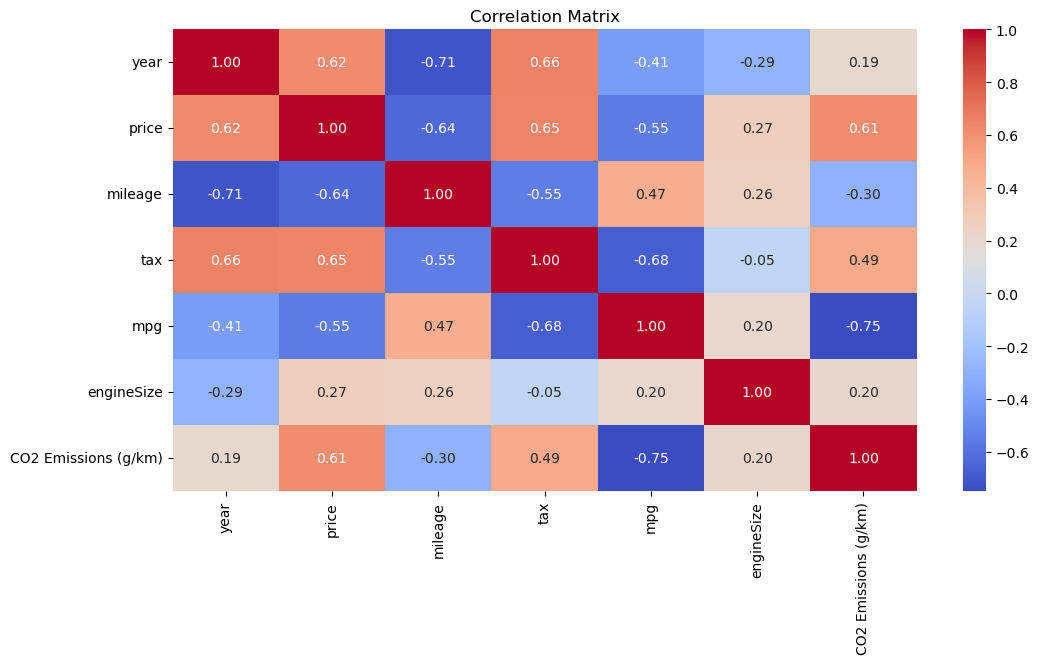

In [49]:
# Select only numeric columns
golf_numr = golf.select_dtypes(include=['float64', 'int64']).copy().dropna()

# Create a matrix to store the correlations
golf_corr = pd.DataFrame(index=golf_numr.columns, columns=golf_numr.columns)

# Calculate the correlations
for i in range(len(golf_numr.columns)):
    for j in range(len(golf_numr.columns)):
        golf_corr.iloc[i, j] = golf_numr.iloc[:, i].corr(golf_numr.iloc[:, j])

# Convert to numeric
golf_corr = golf_corr.apply(pd.to_numeric, errors='coerce')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(golf_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### IV.b. Price vs. Economic Data

#### IV.c. Price vs. Emissions Data

### V. Data modeling

#### V.a. Model Linear Regression on Golf Car Data Variables

In [50]:
import statsmodels.api as sm

# Define the predictor variable (price) and independent variables (others)
X = golf_numr.drop(columns=['price'])
y = golf_numr['price']

# Add a constant term to the independent variables (for the intercept)
X = sm.add_constant(X)

# Fit the linear regression model using statsmodels
model = sm.OLS(y, X).fit()

# Generate the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     2104.
Date:                Tue, 21 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:35:51   Log-Likelihood:                -26089.
No. Observations:                2944   AIC:                         5.219e+04
Df Residuals:                    2937   BIC:                         5.223e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -2.12e+06 

### VI. Conclusion